In [1]:
#url for coxcomb diagrams
url = 'https://en.wikipedia.org/wiki/Pie_chart#Polar_area_diagram'

In [2]:
import pandas as pd
from pandas import Series,DataFrame

In [3]:
titanic_df = pd.read_csv('Titanic.csv')

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [6]:
# Let's import what we'll need for the analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

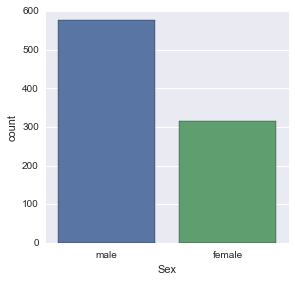

In [7]:
# Let's first check gender
sns.factorplot('Sex',data=titanic_df,kind = "count")


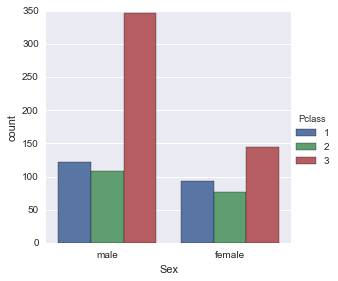

In [8]:
sns.factorplot('Sex', data= titanic_df,hue = 'Pclass',kind = 'count')

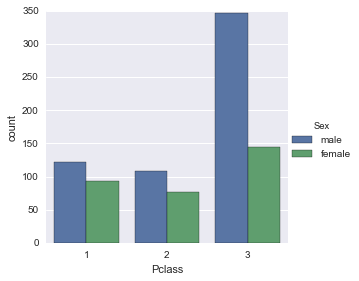

In [9]:
sns.factorplot('Pclass', data= titanic_df,hue = 'Sex',kind = 'count')

In [10]:
def maleFemaleChild(passenger):
    age,sex = passenger
    if age < 16 :
        return 'child'
    else:
        return sex

In [11]:
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(maleFemaleChild,axis = 1)

In [12]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child


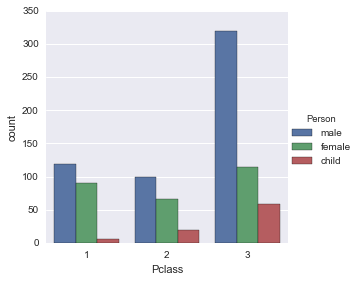

In [13]:
sns.factorplot('Pclass',data = titanic_df,hue ='Person',kind ='count')

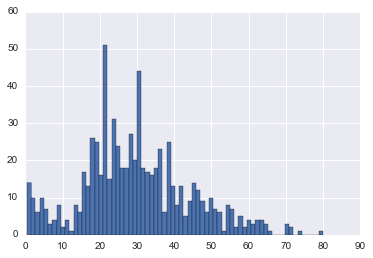

In [14]:
titanic_df['Age'].hist(bins = 70)

In [15]:
titanic_df['Age'].mean()

29.69911764705882

In [16]:
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

In [ ]:
#facet grid in seaborne

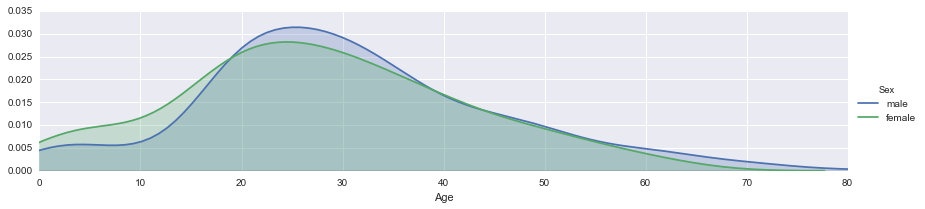

In [18]:
fig = sns.FacetGrid(titanic_df,hue ='Sex',aspect = 4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim = (0,oldest))
fig.add_legend()

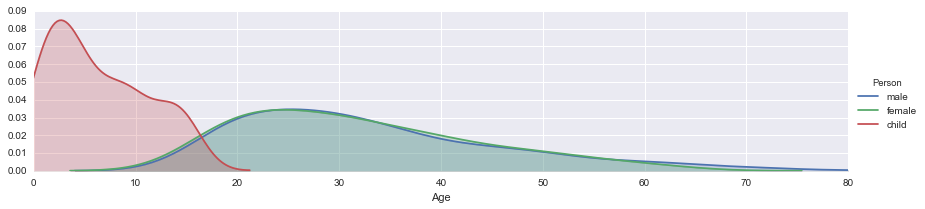

In [19]:
fig = sns.FacetGrid(titanic_df,hue ='Person',aspect = 4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim = (0,oldest))
fig.add_legend()

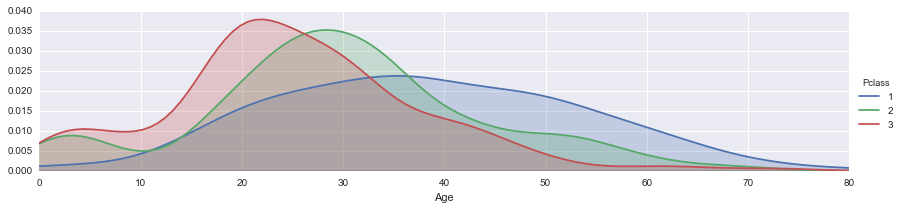

In [21]:
#for class
fig = sns.FacetGrid(titanic_df,hue ='Pclass',aspect = 4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim = (0,oldest))
fig.add_legend()

In [22]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [23]:
#drop the null values in cabin
deck = titanic_df['Cabin'].dropna()

In [24]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

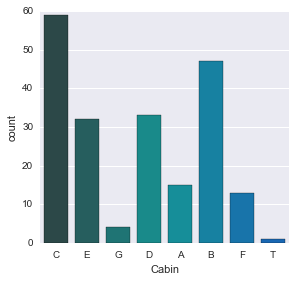

In [26]:
levels = []
for level in deck:
    levels.append(level[0])

#factorplot
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.factorplot('Cabin',data = cabin_df,palette ='winter_d',kind ='count')


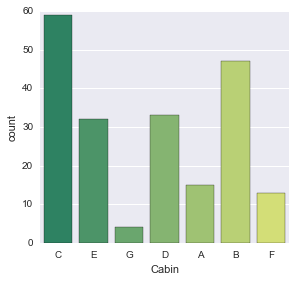

In [28]:
cabin_df = cabin_df[cabin_df != 'T']
sns.factorplot('Cabin',data = cabin_df,palette ='summer',kind ='count')

In [29]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


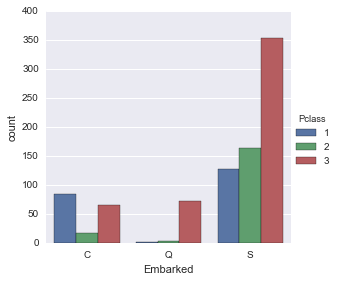

In [32]:
sns.factorplot('Embarked',data = titanic_df,hue = 'Pclass',order=['C','Q','S'],kind ='count')

In [34]:
#who was alone and who was with family?
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, dtype: int64

In [35]:
titanic_df['Alone'].loc[titanic_df['Alone']> 0 ] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

C:\Users\piush\Anaconda2\lib\site-packages\pandas\core\indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [36]:
url_info = "http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning"

In [38]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone


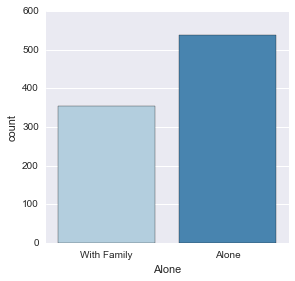

In [39]:
sns.factorplot('Alone', data = titanic_df,palette = 'Blues', kind = 'count')

In [40]:
#what factor help the sinking and surviving
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'}) # mapping

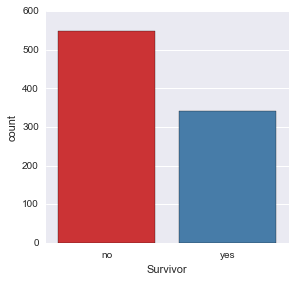

In [41]:
sns.factorplot('Survivor', data = titanic_df,palette = 'Set1', kind = 'count')

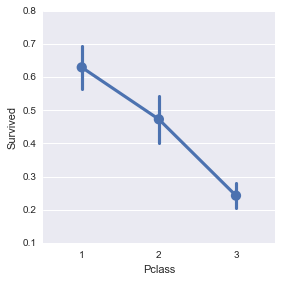

In [45]:
#which factors
#was class a factor
sns.factorplot('Pclass', 'Survived', data = titanic_df)


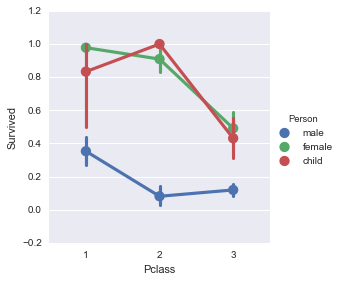

In [46]:
sns.factorplot('Pclass', 'Survived', hue = 'Person',data = titanic_df)

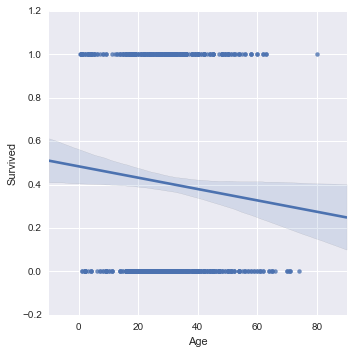

In [47]:
# is age a factor
sns.lmplot('Age','Survived',data = titanic_df)

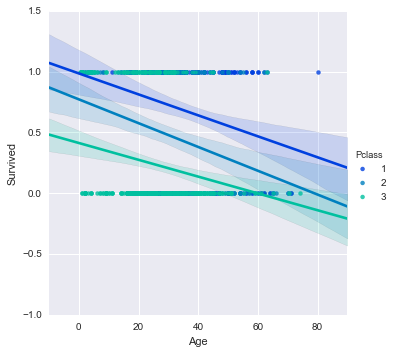

In [48]:
sns.lmplot('Age','Survived',hue = 'Pclass', palette ='winter',data = titanic_df)

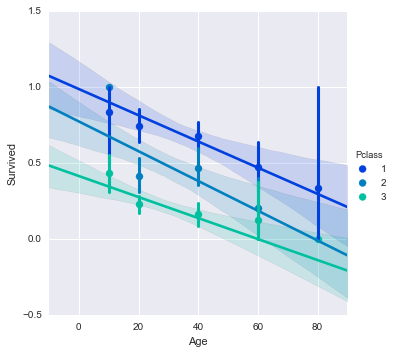

In [49]:
generations = [10,20,40,60,80] # bins
sns.lmplot('Age','Survived',hue = 'Pclass', palette = 'winter',data = titanic_df,x_bins = generations)

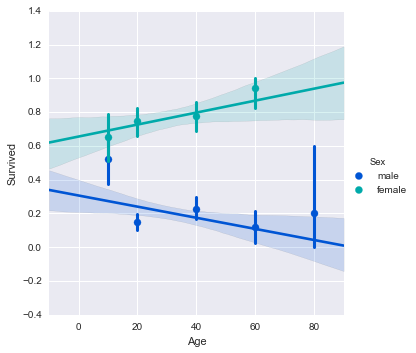

In [50]:
sns.lmplot('Age','Survived',hue = 'Sex',data = titanic_df,palette = 'winter',x_bins = generations)